<a href="https://colab.research.google.com/github/sunveil/imperceptible/blob/main/Test_NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib
!pip install seaborn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [ ]:
import pickle
import glob

def merge(trunk, branch):
  for key, value in branch.items():
    if key in trunk and isinstance(value, dict) and 'adv_example' not in value:
      merge(trunk[key], value)
    else:
      trunk.update({ key: value })

imperceptibles = dict()
pickles = glob.glob("*attacked*.pkl")
print(pickles)
for pkl in pickles:
 print(pkl)
 with open(pkl, 'rb') as f:
   exp = pickle.load(f)
 merge(imperceptibles, exp)

['attacked_g_adversarial-examples-targeted-ner.pkl', 'attacked_i_adversarial-examples-targeted-ner.pkl', 'attacked_r_adversarial-examples-targeted-ner.pkl', 'attacked_d_adversarial-examples-targeted-ner.pkl']
attacked_g_adversarial-examples-targeted-ner.pkl
attacked_i_adversarial-examples-targeted-ner.pkl
attacked_r_adversarial-examples-targeted-ner.pkl
attacked_d_adversarial-examples-targeted-ner.pkl


In [ ]:
def budget_graph_data(exp: str, max_budget=None, levenshtein=False):
  count = []
  total = []
  budgets = []
  for budget, budgetexps in sorted(imperceptibles[exp].items(), key=lambda x: int(x[0])):
    if not max_budget or int(budget) <= int(max_budget):
      count.append(0)
      total.append(0)
      budgets.append(int(budget))
      if "sponge" in exp and "translation" in exp:
        for docid, docexps in budgetexps.items():
          for segid, result in docexps.items():
            if levenshtein:
              count[-1] += result['ref_translation_distance']
              total[-1] += 1
            else:
              count[-1] += result['adv_inference_time']
              total[-1] += result['input_inference_time']
      elif "translation" in exp:
        for docid, docexps in budgetexps.items():
          for segid, result in docexps.items():
            if levenshtein:
              count[-1] += result['ref_translation_distance']
            else:
              count[-1] += result['ref_bleu']
            total[-1] += 1
      elif "mnli" in exp and "untargeted" in exp:
        for pairID, result in budgetexps.items():
          if result['adv_prediction_correct']:
            count[-1] += 1
          total[-1] += 1
      elif "mnli" in exp and "_targeted" in exp:
        for pairID, pairIDexps in budgetexps.items():
          for targetClass, result in pairIDexps.items():
            if result['adv_target_success']:
              count[-1] += 1
            total[-1] += 1
      elif "perspective" in exp or "maxtoxic" in exp:
        for rev_id, result in budgetexps.items():
          if result['adv_toxic']:
            count[-1] += 1
          total[-1] += 1
      elif exp.startswith("ner_targeted") or exp.startswith("emotion_targeted"):
        for id, input_exps in budgetexps.items():
          for target_label, result in input_exps.items():
            if result['adv_target_success']:
              count[-1] += 1
            total[-1] += 1
  print(f"{exp} => {', '.join([f'{x}: {y}' for x,y in zip(budgets, total)])}")
  return budgets, list(map(lambda x,y: x/y, count, total))

## NER attack

ner_targeted_invisibles => 0: 400, 1: 400, 2: 400, 3: 400, 4: 400, 5: 400
ner_targeted_reorderings => 0: 400, 1: 400, 2: 400, 3: 400, 4: 400, 5: 400
ner_targeted_deletions => 0: 400, 1: 400, 2: 400, 3: 400, 4: 400, 5: 400
ner_targeted_homoglyphs => 0: 400, 1: 400, 2: 400, 3: 400, 4: 400, 5: 400


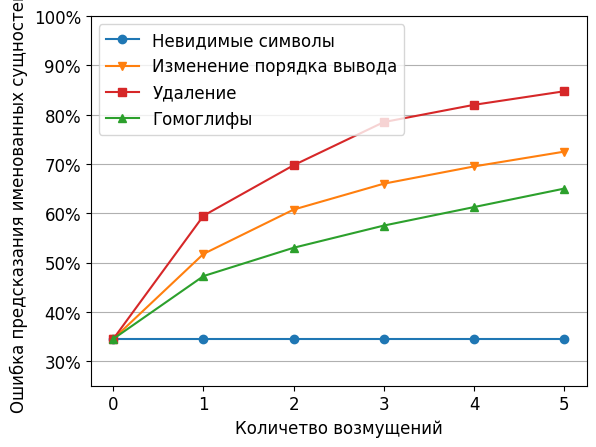

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.rc('font', size=12)

plt.plot(*budget_graph_data('ner_targeted_invisibles', 5), linestyle='-', marker='o', color="tab:blue", label="Невидимые символы")
plt.plot(*budget_graph_data('ner_targeted_reorderings', 5), linestyle='-', marker='v', color="tab:orange", label="Изменение порядка вывода")
plt.plot(*budget_graph_data('ner_targeted_deletions', 5), linestyle='-', marker='s', color="tab:red", label="Удаление")
plt.plot(*budget_graph_data('ner_targeted_homoglyphs', 5), linestyle='-', marker='^', color="tab:green", label="Гомоглифы")

plt.xlabel("Количетво возмущений")
plt.ylabel("Ошибка предсказания именованных сущностей")
#plt.title("Атака на модель извлечения именованных сущностей\n")
plt.xticks(range(6))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.legend(loc=2)
plt.ylim(.25,1)
plt.grid(axis='y')
plt.savefig("NER_attacked.jpg", bbox_inches='tight')
plt.show()

In [ ]:
budget_graph_data('ner_targeted_deletions', 5)

ner_targeted_deletions => 0: 400, 1: 400, 2: 400, 3: 400, 4: 400, 5: 400


([0, 1, 2, 3, 4, 5], [0.345, 0.595, 0.6975, 0.785, 0.82, 0.8475])

In [ ]:
budget_graph_data('ner_targeted_reorderings', 5)

ner_targeted_reorderings => 0: 400, 1: 400, 2: 400, 3: 400, 4: 400, 5: 400


([0, 1, 2, 3, 4, 5], [0.345, 0.5175, 0.6075, 0.66, 0.695, 0.725])

In [ ]:
budget_graph_data('ner_targeted_invisibles', 5)

ner_targeted_invisibles => 0: 400, 1: 400, 2: 400, 3: 400, 4: 400, 5: 400


([0, 1, 2, 3, 4, 5], [0.345, 0.345, 0.345, 0.345, 0.345, 0.345])

In [ ]:
budget_graph_data('ner_targeted_homoglyphs', 5)

ner_targeted_homoglyphs => 0: 400, 1: 400, 2: 400, 3: 400, 4: 400, 5: 400


([0, 1, 2, 3, 4, 5], [0.345, 0.4725, 0.53, 0.575, 0.6125, 0.65])

## NER Defence

In [ ]:
import pickle
import glob

def merge(trunk, branch):
  for key, value in branch.items():
    if key in trunk and isinstance(value, dict) and 'adv_example' not in value:
      merge(trunk[key], value)
    else:
      trunk.update({ key: value })

imperceptibles = dict()
pickles = glob.glob("*def*.pkl")
print(pickles)
for pkl in pickles:
 print(pkl)
 with open(pkl, 'rb') as f:
   exp = pickle.load(f)
 merge(imperceptibles, exp)

['def_r_adversarial-examples-targeted-ner.pkl', 'def_i_adversarial-examples-targeted-ner.pkl', 'def_d_adversarial-examples-targeted-ner.pkl', 'def_g_adversarial-examples-targeted-ner.pkl']
def_r_adversarial-examples-targeted-ner.pkl
def_i_adversarial-examples-targeted-ner.pkl
def_d_adversarial-examples-targeted-ner.pkl
def_g_adversarial-examples-targeted-ner.pkl


ner_targeted_reorderings => 0: 400, 1: 400, 2: 400, 3: 400, 4: 400, 5: 400
ner_targeted_deletions => 0: 400, 1: 400, 2: 400, 3: 400, 4: 400, 5: 400
ner_targeted_invisibles => 0: 400, 1: 400, 2: 400, 3: 400, 4: 400, 5: 400
ner_targeted_homoglyphs => 0: 400, 1: 400, 2: 400, 3: 400, 4: 400, 5: 400


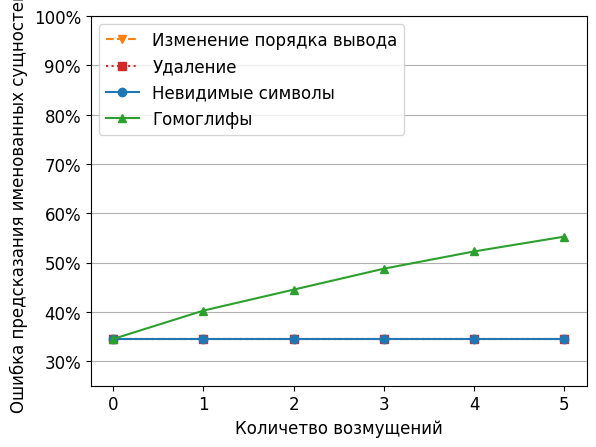

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.rc('font', size=12)

plt.plot(*budget_graph_data('ner_targeted_reorderings', 5), linestyle='--', marker='v', color="tab:orange", label="Изменение порядка вывода")
plt.plot(*budget_graph_data('ner_targeted_deletions', 5), linestyle=':', marker='s', color="tab:red", label="Удаление")
plt.plot(*budget_graph_data('ner_targeted_invisibles', 5), linestyle='-', marker='o', color="tab:blue", label="Невидимые символы")
plt.plot(*budget_graph_data('ner_targeted_homoglyphs', 5), linestyle='-', marker='^', color="tab:green", label="Гомоглифы")

plt.xlabel("Количетво возмущений")
plt.ylabel("Ошибка предсказания именованных сущностей")
#plt.title("Защита от атак на модель извлечения именованных сущностей\n")
plt.xticks(range(6))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.legend(loc=2)
plt.ylim(.25,1)
plt.grid(axis='y')
plt.savefig("NER_after_defence.jpg", bbox_inches='tight')
plt.show()


In [ ]:
budget_graph_data('ner_targeted_homoglyphs', 5)

ner_targeted_homoglyphs => 0: 400, 1: 400, 2: 400, 3: 400, 4: 400, 5: 400


([0, 1, 2, 3, 4, 5], [0.345, 0.4025, 0.445, 0.4875, 0.5225, 0.5525])